<a href="https://colab.research.google.com/github/ThodupunooriSaiManish/DAV_Assignment_205/blob/main/DAV_Assignment(Visualization_with_Matplotlib_)_205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fraud Detection Dataset.csv to Fraud Detection Dataset.csv


In [ ]:
import pandas as pd
df = pd.read_csv('Fraud Detection Dataset.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Use a consistent style
plt.style.use('seaborn-v0_8-darkgrid')

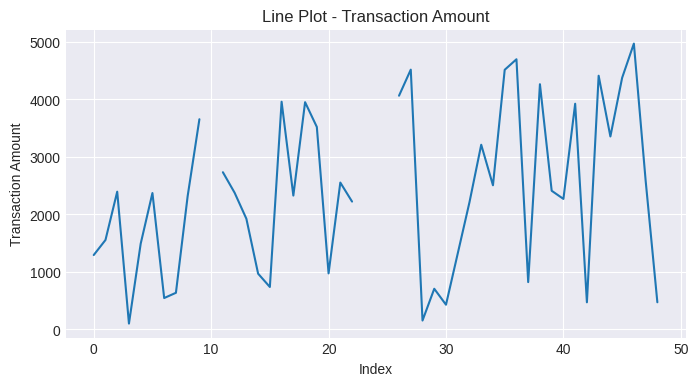

In [ ]:
# ------------------ 1. Simple Line Plot ------------------
plt.figure(figsize=(8, 4))
df['Transaction_Amount'].head(50).plot(title='Line Plot - Transaction Amount')
plt.xlabel("Index")
plt.ylabel("Transaction Amount")
plt.show()

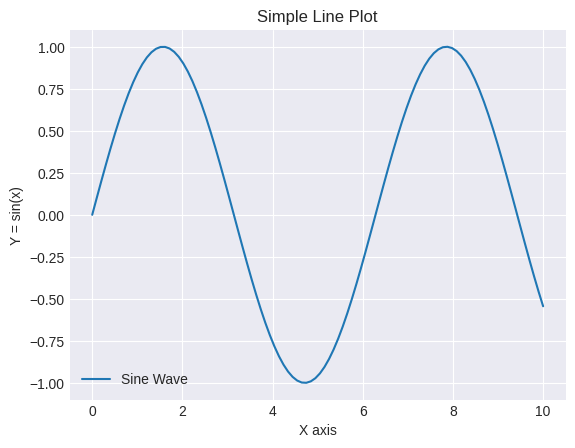

In [ ]:
# ------------------ 1a). Simple Line Plot ------------------
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y, label='Sine Wave')
plt.title("Simple Line Plot")
plt.xlabel("X axis")
plt.ylabel("Y = sin(x)")
plt.legend()
plt.show()


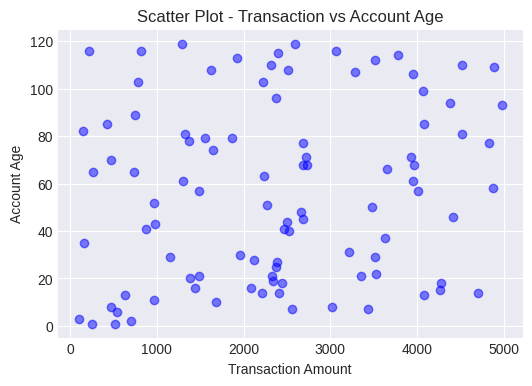

In [ ]:
# ------------------ 2. Scatter Plot ------------------
plt.figure(figsize=(6, 4))
plt.scatter(df['Transaction_Amount'][:100], df['Account_Age'][:100], c='blue', alpha=0.5)
plt.title("Scatter Plot - Transaction vs Account Age")
plt.xlabel("Transaction Amount")
plt.ylabel("Account Age")
plt.show()

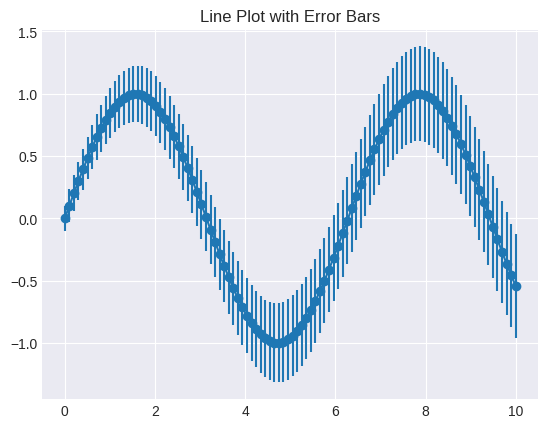

In [ ]:
# ------------------ 3. Visualizing Errors ------------------
x = np.linspace(0, 10, 100)
y = np.sin(x)
error = 0.1 + 0.1 * np.sqrt(x)
plt.figure()
plt.errorbar(x, y, yerr=error, fmt='-o')
plt.title("Line Plot with Error Bars")
plt.show()

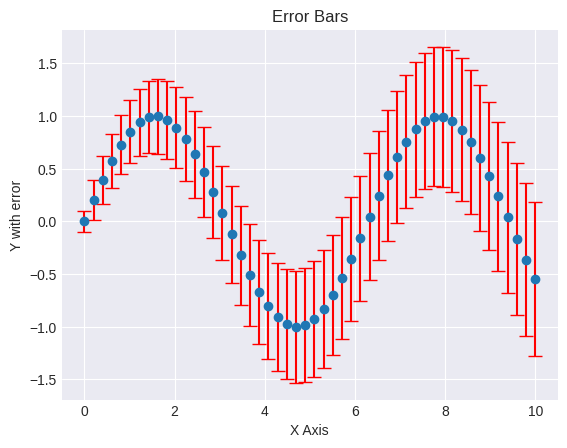

In [ ]:
# ------------------ 3a). Visualizing Errors ------------------
x = np.linspace(0, 10, 50)
y = np.sin(x)
errors = 0.1 + 0.2 * np.sqrt(x)
plt.errorbar(x, y, yerr=errors, fmt='o', ecolor='red', capsize=5)
plt.title("Error Bars")
plt.xlabel("X Axis")
plt.ylabel("Y with error")
plt.show()

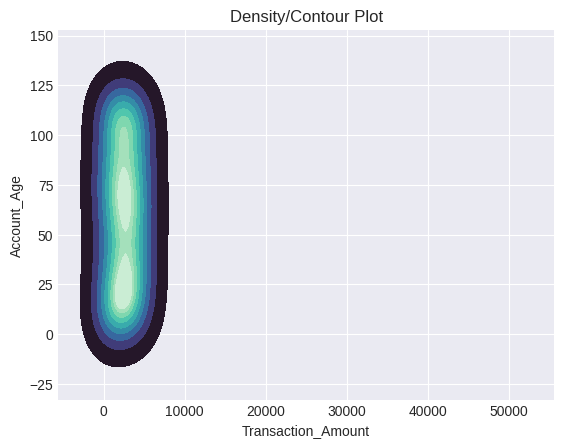

In [ ]:
# ------------------ 4. Density and Contour Plot ------------------
x = df['Transaction_Amount'][:1000]
y = df['Account_Age'][:1000]
xy = np.vstack([x, y])
kde = sns.kdeplot(x=x, y=y, fill=True, cmap="mako")
plt.title("Density/Contour Plot")
plt.show()

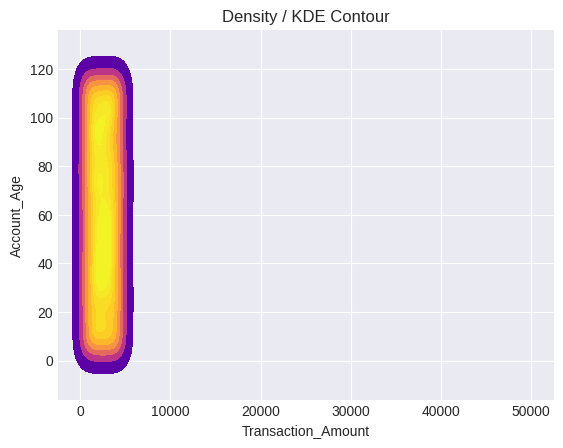

In [ ]:
# ------------------ 4. Density and Contour Plot ------------------
sns.kdeplot(x=df['Transaction_Amount'], y=df['Account_Age'], fill=True, cmap='plasma')
plt.title("Density / KDE Contour")
plt.show()

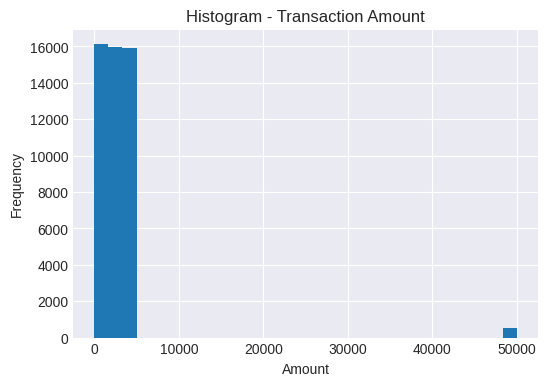

In [ ]:
# ------------------ 5. Histogram ------------------
plt.figure(figsize=(6, 4))
df['Transaction_Amount'].hist(bins=30)
plt.title("Histogram - Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# ------------------ 6. Binning ------------------
df['Amount_Bin'] = pd.cut(df['Transaction_Amount'], bins=5)
print("\nBinned Transaction Amount:\n", df['Amount_Bin'].value_counts())


Binned Transaction Amount:
 Amount_Bin
(-44.963, 10003.584]      47972
(39999.246, 49997.8]        508
(10003.584, 20002.138]        0
(20002.138, 30000.692]        0
(30000.692, 39999.246]        0
Name: count, dtype: int64


Transaction_Amount
(-44.963, 10003.584]      47972
(39999.246, 49997.8]        508
(10003.584, 20002.138]        0
(20002.138, 30000.692]        0
(30000.692, 39999.246]        0
Name: count, dtype: int64


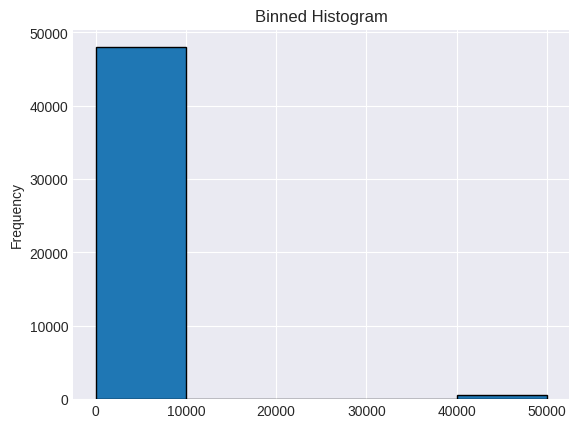

In [ ]:
# ------------------ 6a). Binning ------------------
bins = pd.cut(df['Transaction_Amount'], bins=5)
print(bins.value_counts())
# Plot histogram by bins
df['Transaction_Amount'].plot.hist(bins=5, edgecolor='black')
plt.title("Binned Histogram")
plt.show()

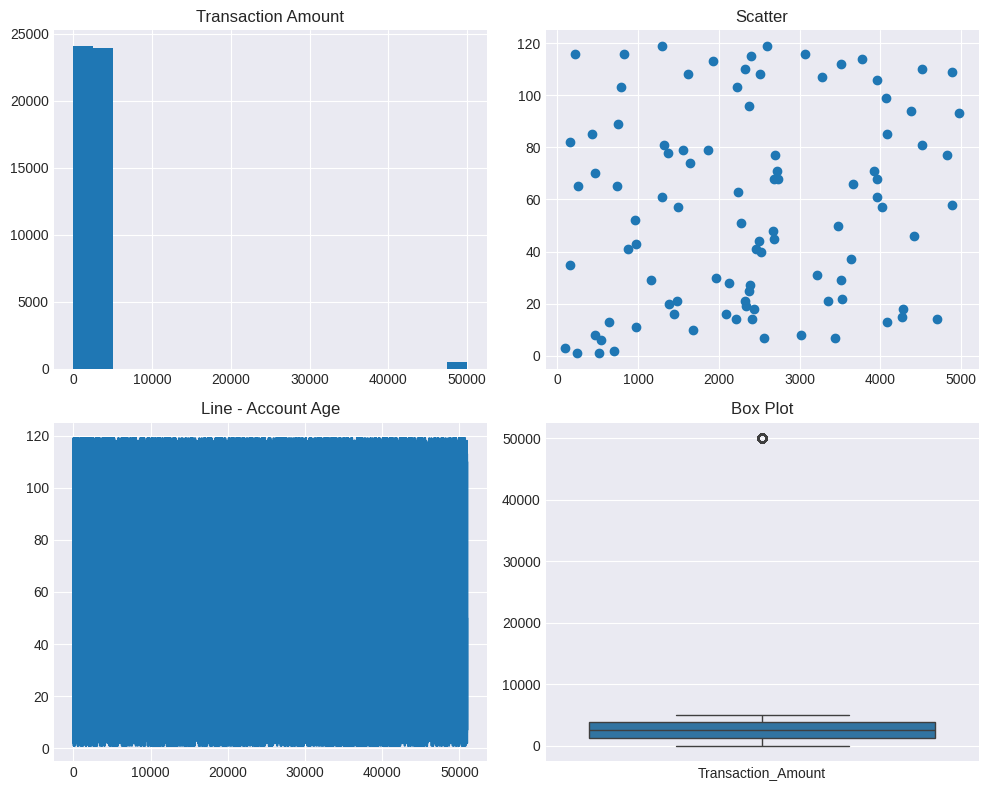

In [ ]:
# ------------------ 7. Multiple Subplots ------------------
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
df['Transaction_Amount'].hist(ax=axs[0, 0], bins=20)
axs[0, 0].set_title("Transaction Amount")
axs[0, 1].scatter(df['Transaction_Amount'][:100], df['Account_Age'][:100])
axs[0, 1].set_title("Scatter")
df['Account_Age'].plot(ax=axs[1, 0])
axs[1, 0].set_title("Line - Account Age")
sns.boxplot(data=df[['Transaction_Amount']], ax=axs[1, 1])
axs[1, 1].set_title("Box Plot")
plt.tight_layout()
plt.show()

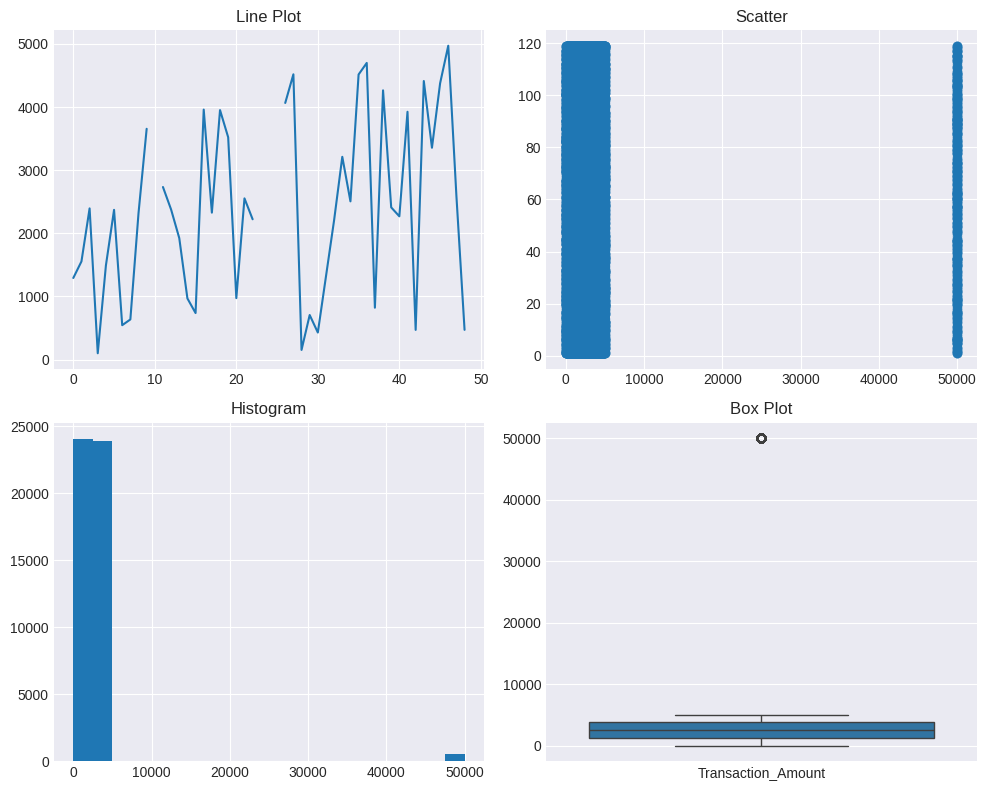

In [ ]:
# ------------------ 7a). Multiple Subplots ------------------
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Subplot 1 - Line
axs[0, 0].plot(df['Transaction_Amount'].head(50))
axs[0, 0].set_title('Line Plot')

# Subplot 2 - Scatter
axs[0, 1].scatter(df['Transaction_Amount'], df['Account_Age'], alpha=0.5)
axs[0, 1].set_title('Scatter')

# Subplot 3 - Histogram
axs[1, 0].hist(df['Transaction_Amount'], bins=20)
axs[1, 0].set_title('Histogram')

# Subplot 4 - Boxplot
sns.boxplot(data=df[['Transaction_Amount']], ax=axs[1, 1])
axs[1, 1].set_title('Box Plot')

plt.tight_layout()
plt.show()


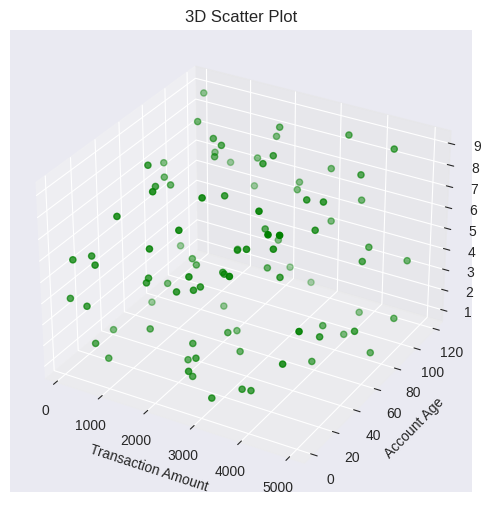

In [ ]:
# ------------------ 8. 3D Plot ------------------
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

if 'Num_Transactions' not in df.columns:
    df['Num_Transactions'] = np.random.randint(1, 10, size=len(df))

ax.scatter(df['Transaction_Amount'][:100], df['Account_Age'][:100], df['Num_Transactions'][:100], c='green')

ax.set_xlabel("Transaction Amount")
ax.set_ylabel("Account Age")
ax.set_zlabel("Num Transactions")
plt.title("3D Scatter Plot")
plt.show()

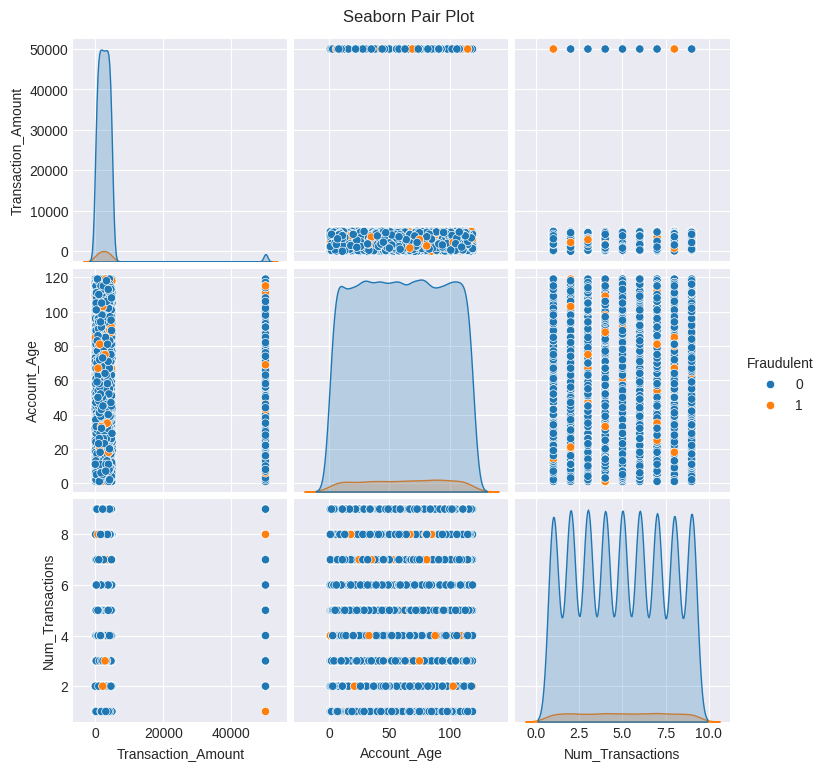

In [ ]:
# ------------------ 9. Seaborn Visualization ------------------
sns.pairplot(df[['Transaction_Amount', 'Account_Age', 'Num_Transactions', 'Fraudulent']].dropna(), hue='Fraudulent')
plt.suptitle("Seaborn Pair Plot", y=1.02)
plt.show()

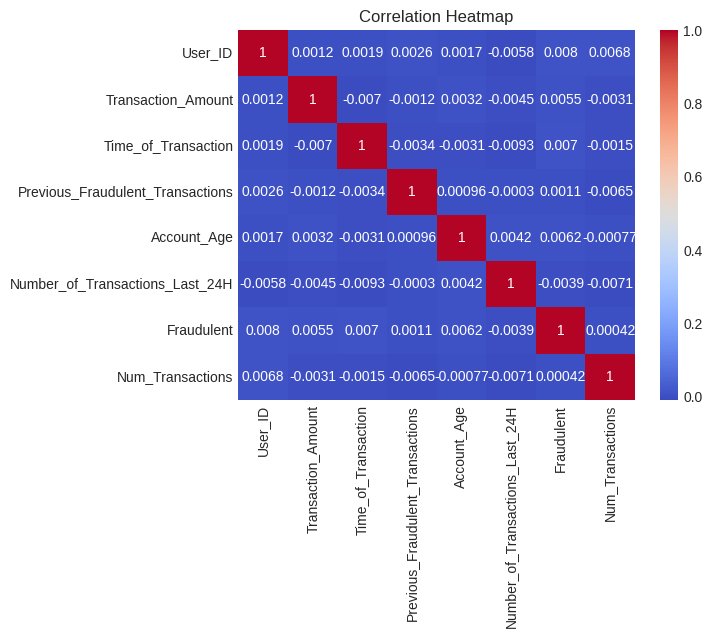

In [ ]:
# ------------------ 10. Heatmap ------------------
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

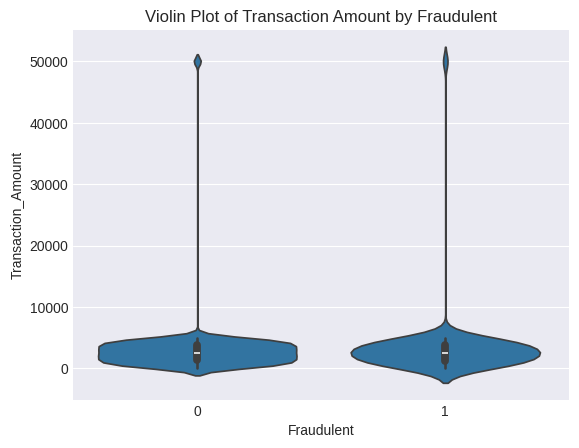

In [ ]:
# ------------------ 11. Violin Plot ------------------
sns.violinplot(x='Fraudulent', y='Transaction_Amount', data=df)
plt.title("Violin Plot of Transaction Amount by Fraudulent")
plt.show()

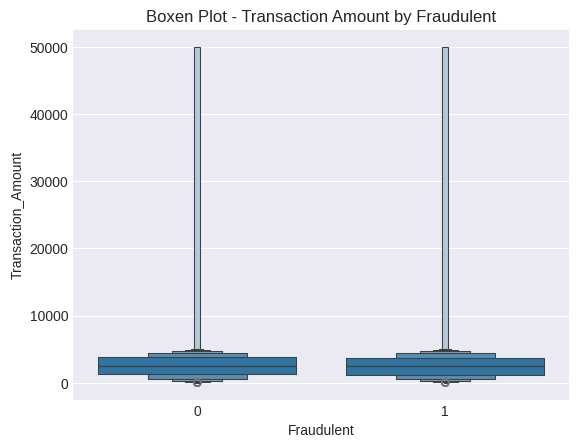

In [ ]:
# ------------------ 12. Boxen Plot ------------------
sns.boxenplot(x='Fraudulent', y='Transaction_Amount', data=df)
plt.title("Boxen Plot - Transaction Amount by Fraudulent")
plt.show()

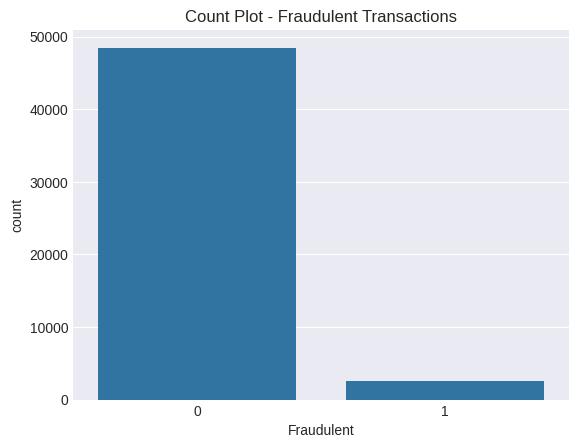

In [ ]:
# ------------------ 13. Count Plot ------------------
sns.countplot(x='Fraudulent', data=df)
plt.title("Count Plot - Fraudulent Transactions")
plt.show()

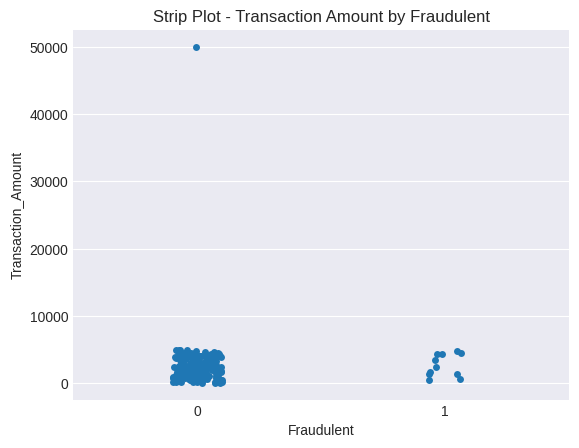

In [ ]:
# ------------------ 14. Strip Plot ------------------
sns.stripplot(x='Fraudulent', y='Transaction_Amount', data=df[:200], jitter=True)
plt.title("Strip Plot - Transaction Amount by Fraudulent")
plt.show()